# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*FILL IN:*
#### What are the top Ten most common types of crimes reported in Los Angeles?
#### How does the representation of victims for each gender compare to other reported victims in Los Angeles?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [71]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from folium import plugins
from folium.plugins import HeatMap
#chose style for the code 
plt.style.use('fivethirtyeight')
#to disply all columns in the table 

pd.set_option('display.max_columns', 500)

#### **Dataset 1**

Type: accessing APIs 

Crime Data from 2020 to Present:

This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database. Please note questions or concerns in the comments. Type: accessing APIs

Method: Gather data by accessing APIs from source data.lacity.org (e.g., The data was gathered using the "API Access" method from https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/data_preview source.)



In [72]:
#FILL IN 1st data gathering and loading method
#crime data website : https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/data_preview

data=requests.get('https://data.lacity.org/resource/2nrs-mtv8.json').json()

data_crime_2020_2024 = pd.DataFrame.from_dict(data)


#### Dataset 2
 ***dataset Data Crime from 2010-2019 (data_cirme_2019):***
 
**about:**

This dataset reflects incidents of crime in the City of Los Angeles from 2010 - 2019. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database. Please note questions or concerns in the comments.


Type: CSV File

Method:  The data was gathered using the Download data manually method from https://data.lacity.org/ source.)



In [73]:
#FILL IN 2nd data gathering and loading method
data_crime_2019=pd.read_csv('Crime_Data_from_2010_to_2019.csv')

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [74]:
#Optional: store the raw data in your local data store
data_crime_2020_2024.to_csv('data_crime_2024.csv',index=False)

In [75]:
data_crime_2024=pd.read_csv('data_crime_2024.csv')

### Variables in both datasets:

| Variable       | Description                                                                                                                     | Type       |
|----------------|---------------------------------------------------------------------------------------------------------------------------------|------------|
| DR_NO          | Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.                              | Plain Text |
| Date Rptd      | MM/DD/YYYY                                                                                                                      | Date & Time|
| DATE OCC       | MM/DD/YYYY                                                                                                                      | Date & Time|
| TIME OCC       | In 24 hour military time.                                                                                                       | Plain Text |
| AREA           | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. | Plain Text |
| AREA NAME      | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. | Plain Text |
| Rpt Dist No   | A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at [this link](http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4) | Plain Text |
| Part 1-2       | Number                                                                                                                          |            |
| Crm Cd         | Indicates the crime committed. (Same as Crime Code 1)                                                                          | Plain Text |
| Crm Cd Desc    | Defines the Crime Code provided.                                                                                               | Plain Text |
| Mocodes        | Modus Operandi: Activities associated with the suspect in commission of the crime. See attached PDF for list of MO Codes in numerical order. [Download MO Codes PDF](https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf) | Plain Text |
| Vict Age       | Two character numeric                                                                                                           | Plain Text |
| Vict Sex       | F - Female M - Male X - Unknown                                                                                                | Plain Text |
| Vict Descent   | Descent Code: (A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - WhiteX - Unknown Z - Asian Indian) | Plain Text |
| Premis Cd      | The type of structure, vehicle, or location where the crime took place.                                                        | Number     |
| Premis Desc    | Defines the Premise Code provided.                                                                                             | Plain Text |
| Weapon Used Cd | The type of weapon used in the crime.                                                                                         | Plain Text |
| Weapon Desc    | Defines the Weapon Used Code provided.                                                                                         | Plain Text |
| Status         | Status of the case. (IC is the default)                                                                                        | Plain Text |
| Status Desc    | Defines the Status Code provided.                                                                                              | Plain Text |
| Crm Cd 1       | Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious. | Plain Text |
| Crm Cd 2       | May contain a code for an additional crime, less serious than Crime Code 1.                                                    | Plain Text |
| Crm Cd 3       | May contain a code for an additional crime, less serious than Crime Code 1.                                                    | Plain Text |
| Crm Cd 4       | May contain a code for an additional crime, less serious than Crime Code 1.                                                    | Plain Text |
| LOCATION       | Street address of crime incident rounded to the nearest hundred block to maintain anonymity.                                   | Plain Text |
| Cross Street   | Cross Street of rounded Address                                                                                                 | Plain Text |
| LAT            | Latitude                                                                                                                        | Number     |
| LON            | Longtitude                                                                                                                      | Number     |


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: completeness => Missing data

#### Inspecting the dataframe visually

In [15]:
# Inspecting the dataframe visually
data_crime_2019.head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION
0,0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,48,M,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV
1,1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL
2,2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST
3,3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,47,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL
4,4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",47,F,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST


<Axes: >

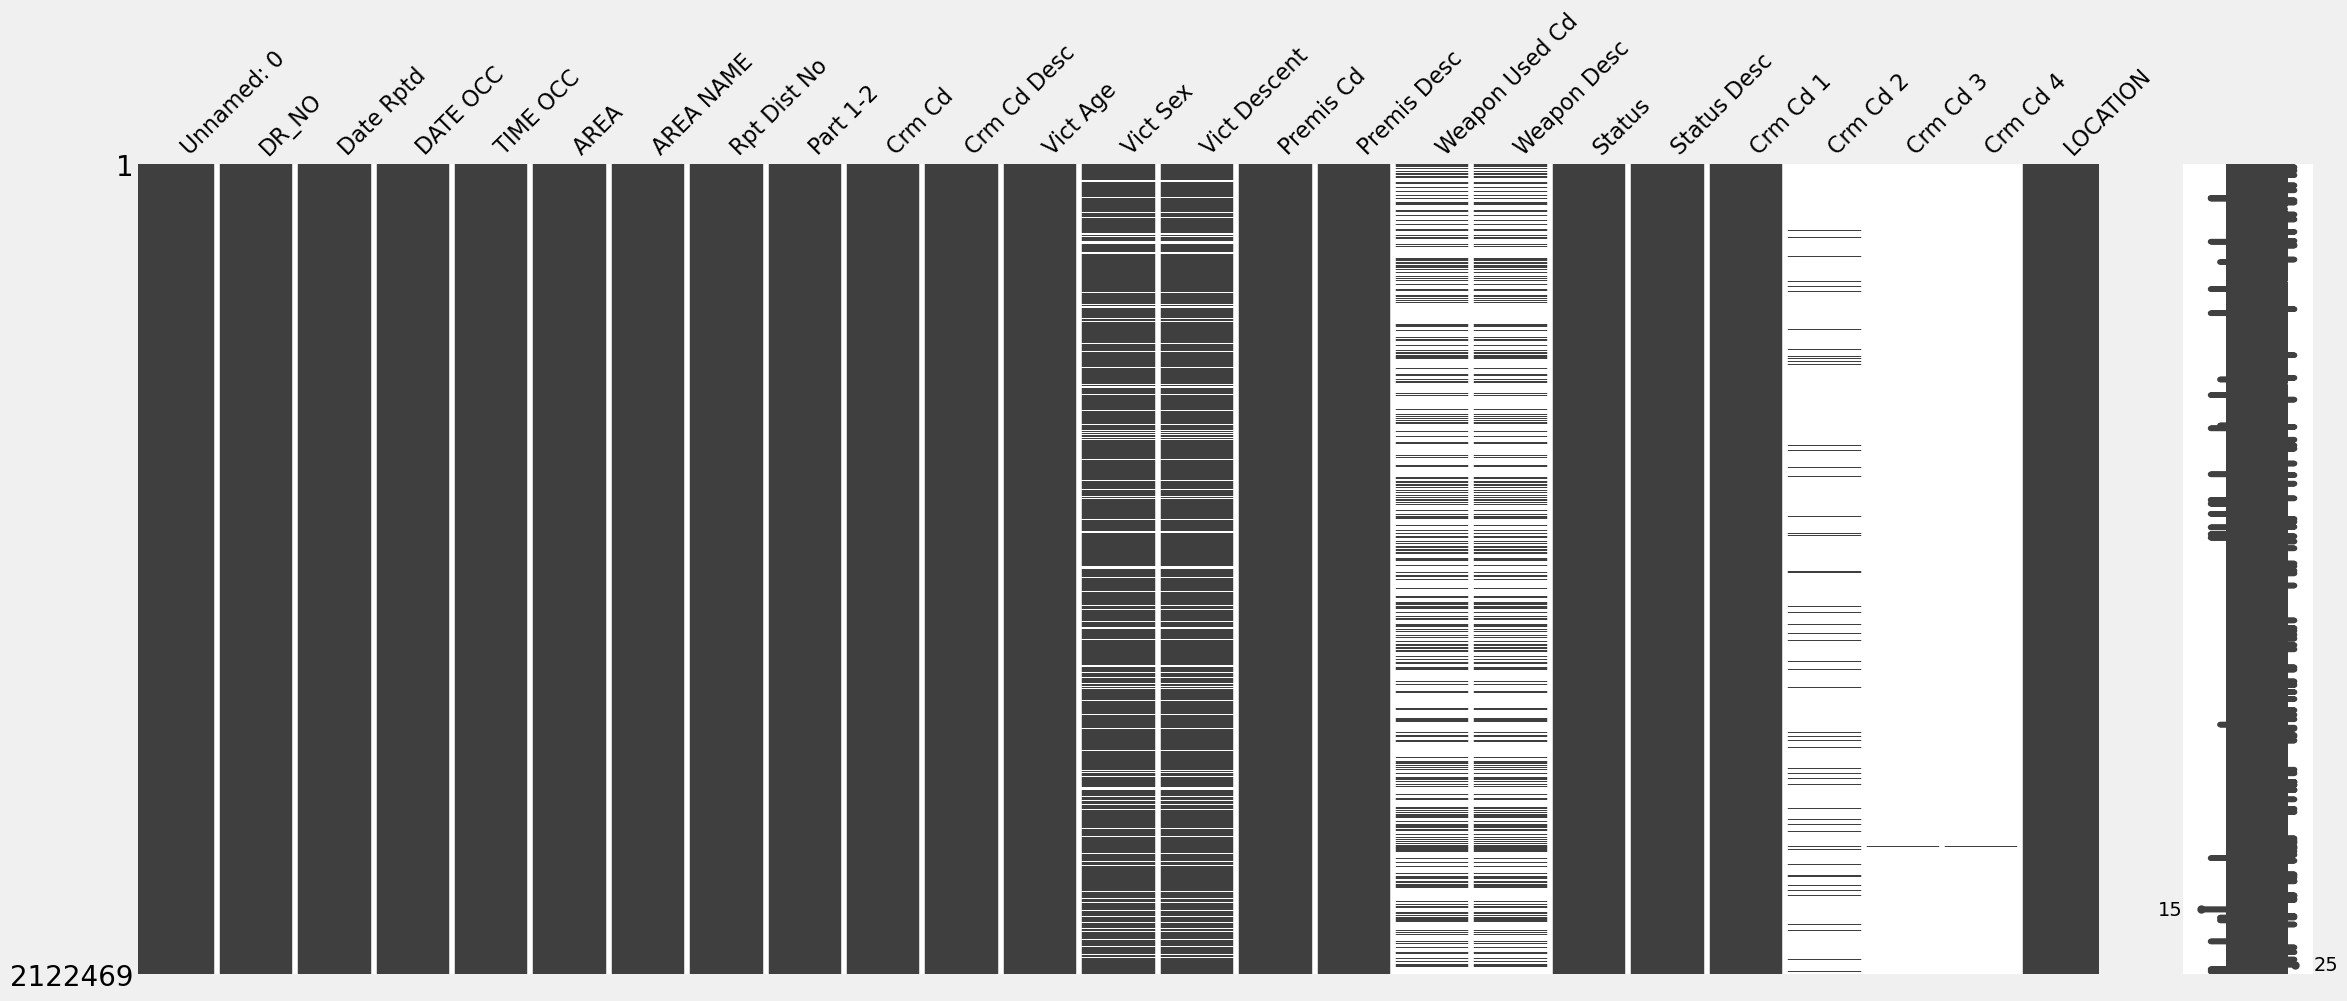

In [16]:
#visualize missing data on the dataframe 
msno.matrix(data_crime_2019);

In [17]:
#Inspecting the dataframe visually
data_crime_2024.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101,STREET,AA,Adult Arrest,510,998.0,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330,998.0,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405,CLOTHING STORE,IC,Invest Cont,343,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,H,102,SIDEWALK,IC,Invest Cont,354,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN


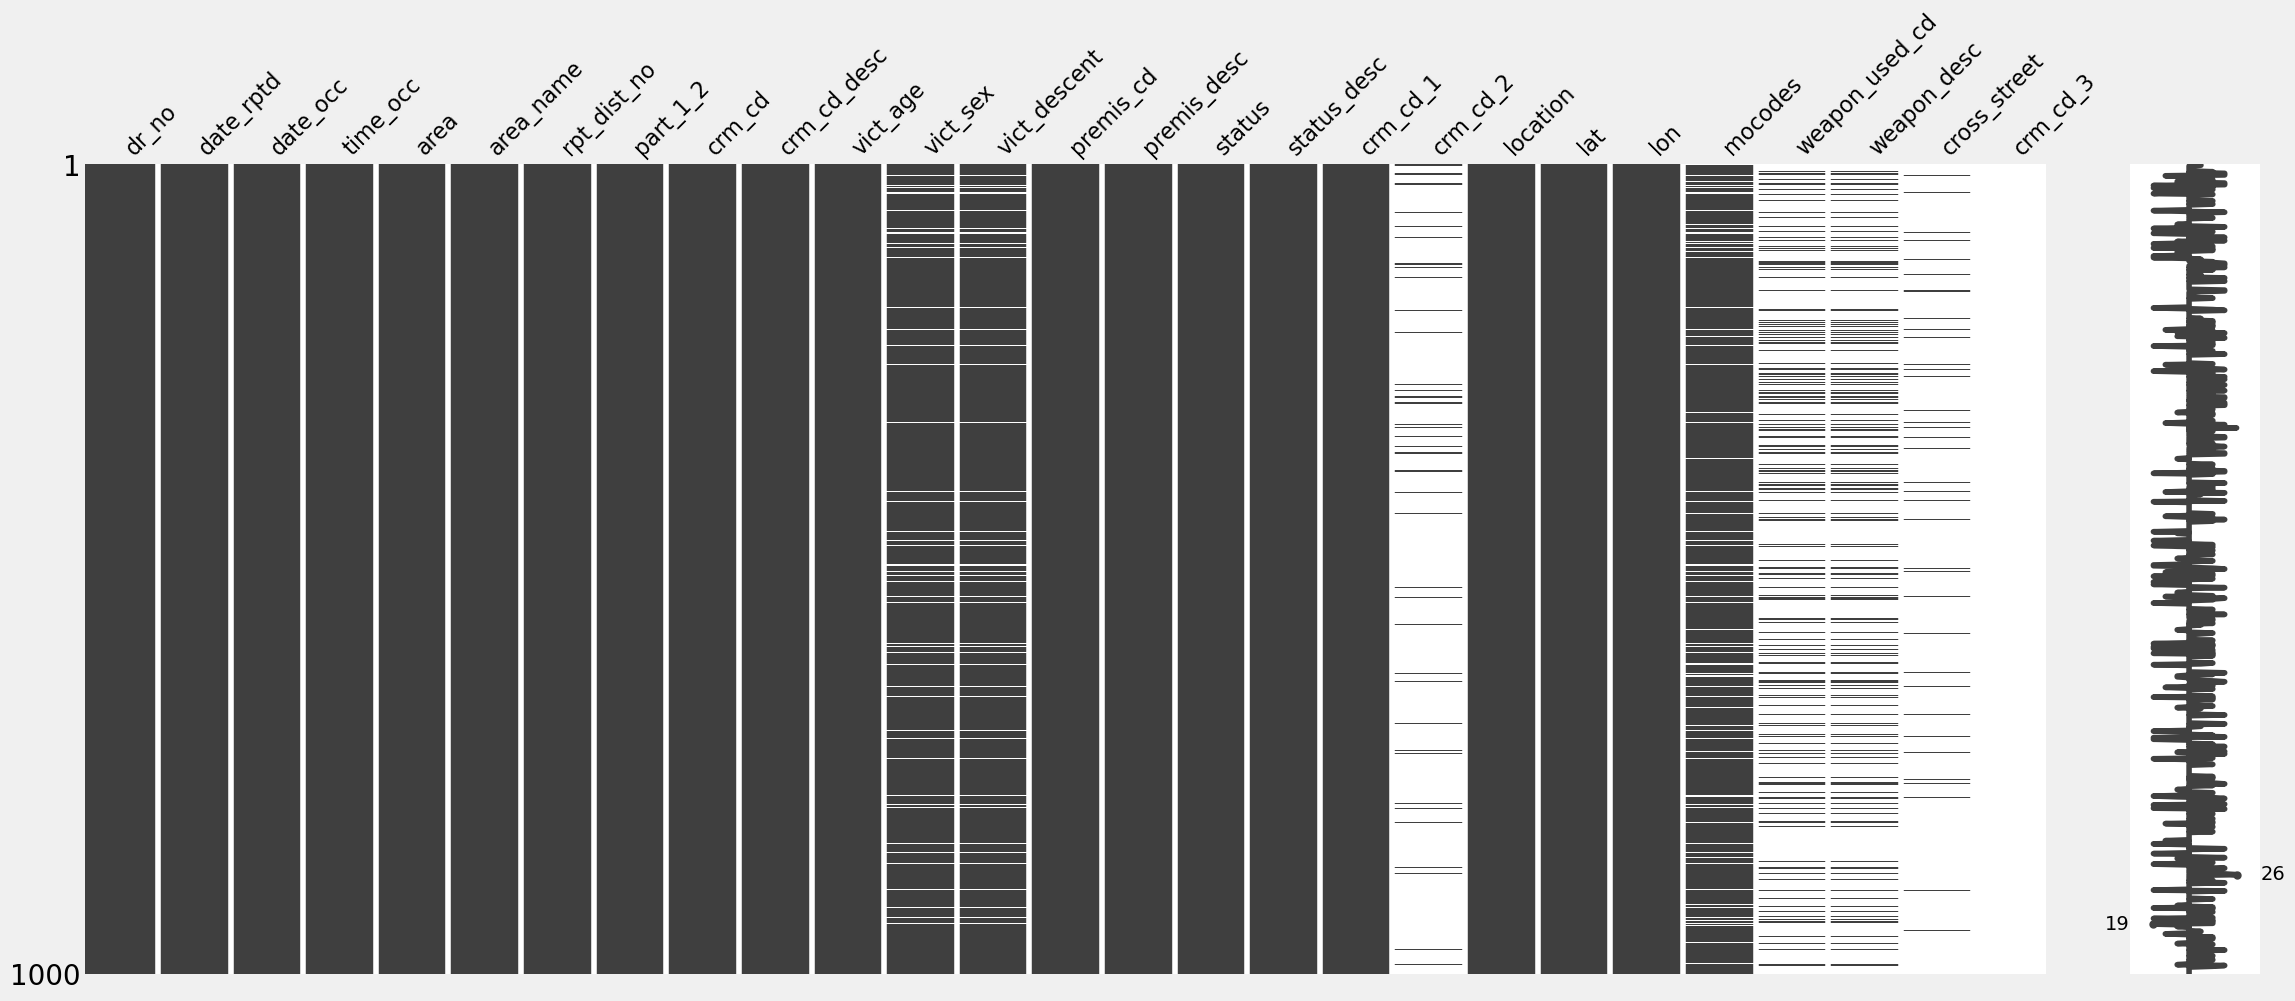

In [19]:
##visualize missing data on the dataframe
msno.matrix(data_crime_2024);

#### Inspecting the dataframe programmatically

In [20]:
#FILL IN - Inspecting the dataframe programmatically
print(data_crime_2019.shape)
data_crime_2019.isnull().sum()

(2122469, 25)


Unnamed: 0              0
DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Vict Age                0
Vict Sex           196814
Vict Descent       196860
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1408915
Weapon Desc       1408916
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1981221
Crm Cd 3          2118909
Crm Cd 4          2122364
LOCATION                0
dtype: int64

In [21]:
print(data_crime_2024.shape)
data_crime_2024.isnull().sum()

(1000, 27)


dr_no               0
date_rptd           0
date_occ            0
time_occ            0
area                0
area_name           0
rpt_dist_no         0
part_1_2            0
crm_cd              0
crm_cd_desc         0
vict_age            0
vict_sex           58
vict_descent       58
premis_cd           0
premis_desc         0
status              0
status_desc         0
crm_cd_1            0
crm_cd_2          939
location            0
lat                 0
lon                 0
mocodes            92
weapon_used_cd    793
weapon_desc       793
cross_street      953
crm_cd_3          999
dtype: int64




### Issue and Justification:
> #### Completeness Issue:
There are significant completeness issues observed in both datasets.

> #### Quality Issue - data_crime_2019 dataset:
Several columns, including 'Crm Cd 2', 'Crm Cd 3', and 'Crm Cd 4', have a high proportion of missing values. Additionally, 'vict_sex', 'vict_descent', 'weapon_used_cd', and 'weapon_desc' contain more than 100,000 missing values each.

> #### Quality Issue - data_crime_2024 dataset:
Similar to the 2019 dataset, 'Crm Cd 2' and 'cross_street' exhibit a substantial number of missing values. Furthermore, 'weapon_used_cd' and 'weapon_desc' have missing values in half of the columns.

> #### These missing values may impact the integrity and reliability of the analysis conducted on the datasets.

### Quality Issue 2: 

In [22]:
# Inspecting  Accuracy issues in the dataframe visually for data_crimes_2019
#Apply the cleaning strategy
data_crime_2019[data_crime_2019['Vict Age'] < 10].head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION
1,1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL
2,2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0,M,H,103.0,ALLEY,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST
37,37,100100616,02/11/2010 12:00:00 AM,02/11/2010 12:00:00 AM,1515,1,Central,192,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,M,H,102.0,SIDEWALK,NaN,NaN,AA,Adult Arrest,341.0,NaN,NaN,NaN,PICO
46,46,100100638,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,100,1,Central,164,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,740.0,NaN,NaN,NaN,100 W 7TH ST
51,51,100100654,02/27/2010 12:00:00 AM,02/27/2010 12:00:00 AM,1955,1,Central,174,2,946,OTHER MISCELLANEOUS CRIME,0,M,W,101.0,STREET,NaN,NaN,AA,Adult Arrest,946.0,NaN,NaN,NaN,W 7TH ST


In [23]:
# Inspecting the dataframe programmatically for data_crimes_2019
data_crime_2019['Vict Age'].sort_values()

373923     -12
149348     -12
170058     -12
174739     -11
250512     -11
          ... 
19130       99
1990497     99
808911      99
972066     114
1758305    118
Name: Vict Age, Length: 2122469, dtype: int64

In [24]:
data_crime_2024[data_crime_2024['vict_age'] < 10].head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101,STREET,AA,Adult Arrest,510,998.0,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN
11,221908151,2022-04-12T00:00:00.000,2020-10-01T00:00:00.000,1,19,Mission,1988,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,8,F,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,812,821.0,13400 RANGOON ST,34.2285,-118.4258,0913 2024 1817 0360 1258 0507,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN
12,230204214,2023-01-05T00:00:00.000,2020-02-01T00:00:00.000,800,2,Rampart,201,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,812,860.0,900 N MARIPOSA AV,34.0868,-118.2991,1251 1258 0913 0400 0500 0522 1817,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN
13,230409878,2023-06-19T00:00:00.000,2020-04-11T00:00:00.000,1200,4,Hollenbeck,417,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,8,F,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,812,860.0,4400 MOONSTONE DR,34.0784,-118.1936,1258 0522 0400 0551 0360 0913,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN
14,221008844,2022-05-06T00:00:00.000,2020-11-01T00:00:00.000,130,10,West Valley,1029,1,510,VEHICLE - STOLEN,0,NaN,NaN,101,STREET,IC,Invest Cont,510,NaN,VALJEAN ST,34.1939,-118.4859,NaN,NaN,NaN,VANOWEN AV,NaN


In [25]:
data_crime_2024['vict_age'].sort_values()

995    -2
149    -2
686    -2
805    -2
655    -2
       ..
454    82
446    83
954    84
360    89
449    91
Name: vict_age, Length: 1000, dtype: int64

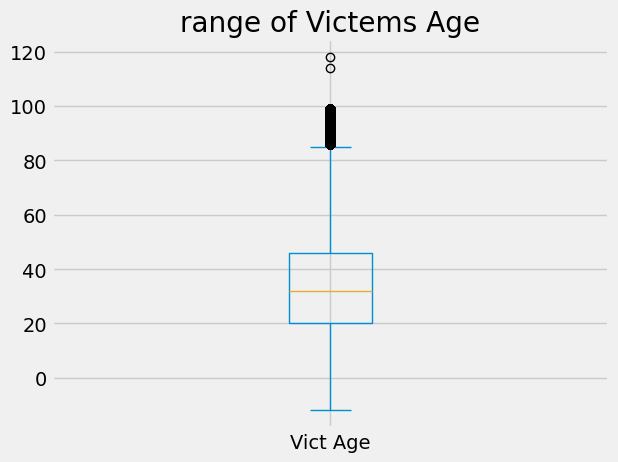

In [26]:
data_crime_2019['Vict Age'].plot(kind='box')
plt.title('range of Victems Age')
plt.show()

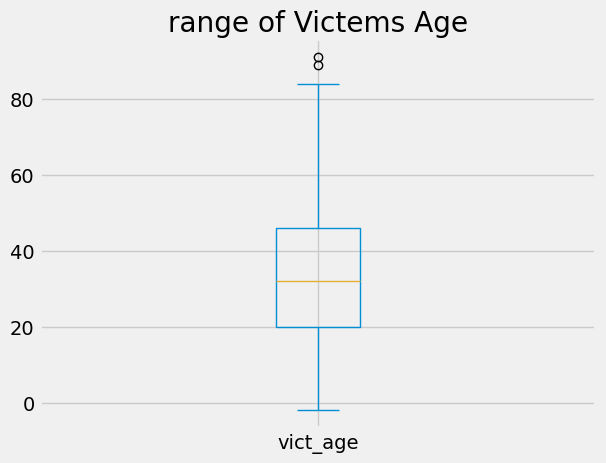

In [27]:
data_crime_2024['vict_age'].plot(kind='box')
plt.title('range of Victems Age')
plt.show()

### Issue and justification: 
> #### Accuracy Issue:
The data quality issues primarily revolve around accuracy. Some results contain ages less than 1, which lack sufficient information for proper analysis. Therefore, we need to drop these entries. Additionally, there is a validity issue observed in both datasets, where outliers are present in the same column.

### Tidiness Issue 1:

In [28]:
# Inspecting the dataframe visually
data_crime_2019.head(0)

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION


In [29]:
#Inspecting the dataframe visually
data_crime_2024.head(0)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3


In [30]:
#FILL IN - Inspecting the dataframe programmatically
data_crime_2019.columns

Index(['Unnamed: 0', 'DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ',
       'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION'],
      dtype='object')

In [31]:
data_crime_2024.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3'],
      dtype='object')

### Issue and justification: 
> #### Inconsistency in Column Naming Convention:
The data_crime_2019 dataset employs uppercase letters for column names, while the data_crime_2024 dataset uses lowercase letters. To ensure consistency and facilitate easier indexing, it is necessary to standardize the column names in the data_crime_2019 dataset to lowercase letters and convert them to snake_case format.



### Tidiness Issue 2: 

In [32]:
#Inspecting the dataframe visually for data_crime_2019
data_crime_2019['Crm Cd Desc']

0                                   VIOLATION OF COURT ORDER
1          VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
2                                  OTHER MISCELLANEOUS CRIME
3                                   VIOLATION OF COURT ORDER
4                                            RAPE, ATTEMPTED
                                 ...                        
2122464              CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT
2122465                                                ARSON
2122466               CRIMINAL THREATS - NO WEAPON DISPLAYED
2122467      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
2122468                                BURGLARY FROM VEHICLE
Name: Crm Cd Desc, Length: 2122469, dtype: object

In [33]:
#Inspecting the dataframe programmatically for data_crime_2019
data_crime_2019['Crm Cd Desc'].unique()

array(['VIOLATION OF COURT ORDER',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'OTHER MISCELLANEOUS CRIME', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY', 'BOMB SCARE',
       'CHILD NEGLECT (SEE 300 W.I.C.)',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ATTEMPTED ROBBERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY', 'ARSON',
       'RAPE, FORCIBLE', 'BRANDISH WEAPON',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'SHOTS FIRED AT INHABITED DWELLING', 'VEHICLE - STOLEN',
    

In [34]:
#Inspecting the dataframe visually for data_crime_2024
data_crime_2024.crm_cd_desc.head()

0                            VEHICLE - STOLEN
1                       BURGLARY FROM VEHICLE
2                               BIKE - STOLEN
3    SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
4                           THEFT OF IDENTITY
Name: crm_cd_desc, dtype: object

In [35]:
#Inspecting the dataframe programmatically for data_crime_2019
data_crime_2024.crm_cd_desc.unique()

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)', 'BURGLARY', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',

### Issue and Justification:
> #### Multiple Variables Stored in One Column:
The 'crm cd desc' column contains multiple variables, including crime descriptions and grand, packed into a single cell. To enhance data clarity and analysis capabilities, it is necessary to separate each crime into its own row and create a separate column for grand.



### Tidiness Issue 3 : 

In [36]:
#Inspecting the dataframe visuallyd
data_crime_2019[['Crm Cd','Crm Cd Desc','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4']].head(20)

,Crm Cd,Crm Cd Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4
0,900,VIOLATION OF COURT ORDER,900.0,NaN,NaN,NaN
1,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",740.0,NaN,NaN,NaN
2,946,OTHER MISCELLANEOUS CRIME,946.0,NaN,NaN,NaN
3,900,VIOLATION OF COURT ORDER,900.0,998.0,NaN,NaN
4,122,"RAPE, ATTEMPTED",122.0,NaN,NaN,NaN
5,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),442.0,NaN,NaN,NaN
6,330,BURGLARY FROM VEHICLE,330.0,NaN,NaN,NaN
7,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0,NaN,NaN,NaN
8,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0,NaN,NaN,NaN
9,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",341.0,998.0,NaN,NaN


In [37]:
#Inspecting the dataframe programmatically
data_crime_2019.isnull().sum()

Unnamed: 0              0
DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Vict Age                0
Vict Sex           196814
Vict Descent       196860
Premis Cd              53
Premis Desc           187
Weapon Used Cd    1408915
Weapon Desc       1408916
Status                  3
Status Desc             0
Crm Cd 1               10
Crm Cd 2          1981221
Crm Cd 3          2118909
Crm Cd 4          2122364
LOCATION                0
dtype: int64

### Issue and Justification:
> #### Multiple Types of Observational Units Stored in the Same Table:
The presence of columns such as 'Crm Cd' alongside other unrelated columns results in multiple types of observational units within the same table. Due to a high proportion of missing values in these columns, it is recommended to remove them from the dataset.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [38]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
data_crime_2019_copy=data_crime_2019.copy()
data_crime_2024_copy=data_crime_2024.copy()

### **Quality Issue 1: missing values

In [39]:
#Apply the cleaning strategy
#drop columns thats contain 60% or above missing values and Mocodes column bc there is no data source about it 
data_crime_2019_copy.drop(columns=['Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4'],inplace=True)

In [40]:
#change the missing values and - to be  X-unknowing 
data_crime_2019_copy['Vict Sex'] = data_crime_2019_copy['Vict Sex'].replace([np.nan, '-'], 'X')
data_crime_2019_copy['Vict Descent'] = data_crime_2019_copy['Vict Descent'].replace([np.nan,'-','unknowing'], 'UN')

In [41]:
#replace rows that's contian nan in Status column by CC from Status Desc related to anther rows contain same result
data_crime_2019_copy['Status'] = data_crime_2019_copy['Status'].replace(np.nan, 'CC')


In [42]:
#exlude the result in Premis Desc thats contain missing values 
data_crime_2019_copy=data_crime_2019_copy[data_crime_2019_copy['Premis Desc'].notnull()]

In [43]:
# full fillment all Crm Cd 1 from Crm Cd 
data_crime_2019_copy['Crm Cd 1'] = data_crime_2019_copy.groupby('Crm Cd')['Crm Cd 1'].ffill()

In [44]:
#Validate the cleaning was successful
data_crime_2019_copy.isna().sum()

Unnamed: 0      0
DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
dtype: int64

Justification: 
#### After dropping certain columns and rows, as well as filling missing values by interpolating from adjacent rows, both datasets no longer contain any missing values.

### Quality Issue 2:  Accuracy  issue

In [45]:
#Apply the cleaning strategy
data_crime_2019_copy=data_crime_2019_copy[data_crime_2019_copy['Vict Age'] >= 1]
data_crime_2024_copy=data_crime_2024_copy[data_crime_2024_copy['vict_age'] >= 1]

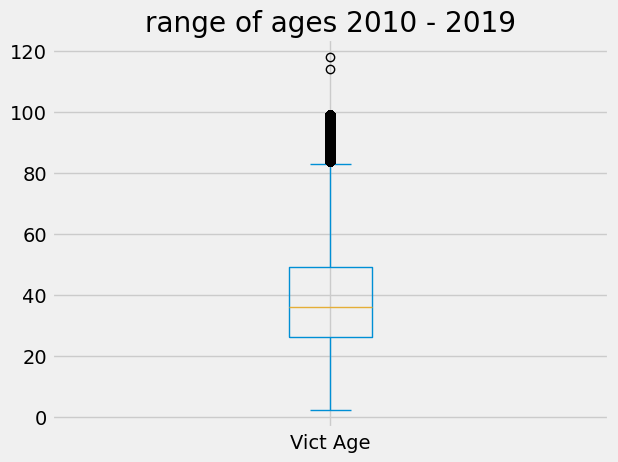

In [46]:
#Validate the cleaning was successful
#Apply the cleaning strategy
data_crime_2019_copy['Vict Age'].plot(kind='box')
plt.title('range of ages 2010 - 2019')
plt.show()

Text(0.5, 1.0, 'range of Ages 2020 - 2024')

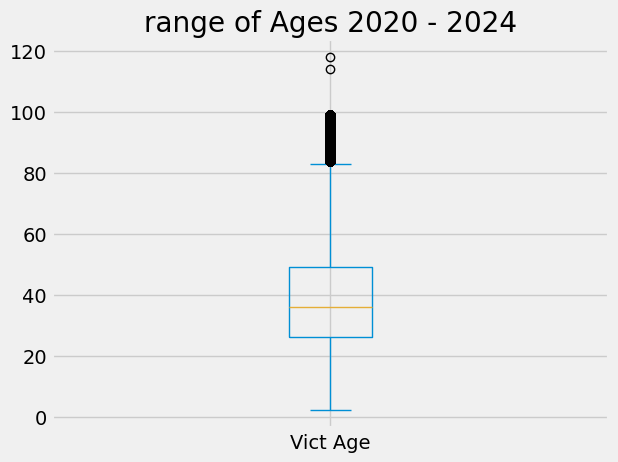

In [47]:
data_crime_2019_copy['Vict Age'].plot(kind='box')
plt.title('range of Ages 2020 - 2024')

Justification:
#### Rows containing age values less than 1 year were dropped from the dataset to ensure data integrity and consistency.

### **Tidiness Issue 1: columns names**

In [48]:
#Apply the cleaning strategy
#We will change data_crime_2019 columns name from upper case into lower case by lambda func
data_crime_2019_copy.rename(columns=lambda x: x.lower(), inplace=True)
data_crime_2019_copy.columns = data_crime_2019_copy.columns.str.replace(' ', '_')

In [49]:
#Validate the cleaning was successful
data_crime_2019_copy.columns

Index(['unnamed:_0', 'dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area_',
       'area_name', 'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'status', 'status_desc', 'crm_cd_1', 'location'],
      dtype='object')

In [50]:
data_crime_2024_copy.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3'],
      dtype='object')

Justification:
> #### The column names in the data_crime_2019 dataset have been converted from uppercase to lowercase using a lambda function. With this modification completed, the datasets for 2019 and 2024 can now be combined seamlessly.

### **Tidiness Issue 2: FILL IN**

In [51]:
def clean_and_transform(dataframe):
    # Perform the split and stack operation on 'crm_cd_desc'
    crm_cd_desc_split = dataframe['crm_cd_desc'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
    crm_cd_desc_split.name = 'crime'  # Renaming the resulting Series for clarity

    # Join the expanded 'crm_cd_desc' with the original DataFrame based on the index,
    # which contains 'dr_no' and any other additional columns
    dataframe = dataframe.drop(columns=['crm_cd_desc']).join(crm_cd_desc_split).reset_index(drop=True)

    # Change the new 'crime' column from being the last one to be the tenth column from the left
    columns = list(dataframe.columns)
    # First, remove the 'crime' column name
    columns.remove('crime')
    # Then insert 'crime' at the desired position
    columns.insert(9, 'crime')
    # Now, reindex the DataFrame with the new columns order
    dataframe = dataframe.reindex(columns=columns)
    return dataframe

# Assuming data_crime_2019_copy and data_crime_2024_copy are your DataFrames
data_crime_2019_copy = clean_and_transform(data_crime_2019_copy)
data_crime_2024_copy = clean_and_transform(data_crime_2024_copy)



In [52]:
data_crime_2019_copy.head()

,unnamed:_0,dr_no,date_rptd,date_occ,time_occ,area_,area_name,rpt_dist_no,part_1-2,crime,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,location
0,0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,VIOLATION OF COURT ORDER,900,48,M,H,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,900.0,300 E GAGE AV
1,3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,VIOLATION OF COURT ORDER,900,47,F,W,101.0,STREET,IC,Invest Cont,900.0,CAHUENGA BL
2,4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,RAPE,122,47,F,H,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST
3,4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,ATTEMPTED,122,47,F,H,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST
4,5,100100506,01/05/2010 12:00:00 AM,01/04/2010 12:00:00 AM,1650,1,Central,162,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),442,23,M,B,404.0,DEPARTMENT STORE,AA,Adult Arrest,442.0,700 W 7TH ST


In [53]:
data_crime_2024_copy.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crime,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3
0,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330,998.0,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN
1,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN
2,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405,CLOTHING STORE,IC,Invest Cont,343,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN
3,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,H,102,SIDEWALK,IC,Invest Cont,354,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN
4,231808869,2023-04-04T00:00:00.000,2020-12-01T00:00:00.000,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,41,M,H,501,SINGLE FAMILY DWELLING,IC,Invest Cont,354,NaN,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN


In [54]:
#FILL IN - Validate the cleaning was successful
print(data_crime_2019_copy.shape)
print(data_crime_2024_copy.shape)

(2304365, 20)
(1122, 27)


Justification:
>### We encountered multiple variables stored within one column and resolved it as follows:
> #### we had a multipul variable inside one column then we solve it as :
> #### We split the 'crm cd desc' column based on the comma delimiter to create a list of crimes.
> #### We then exploded this list, creating a new row for each crime while retaining the associated 'dr_no' column.
> #### With each crime now on its own row, we reorganized the DataFrame to position the new 'crime' column at the desired tenth position

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [55]:
#Remove unnecessary variables and combine datasets
data_crime_2019_copy.drop(columns=[ 'date_rptd', 'date_occ', 'time_occ', 'area_', 'area_name',
       'rpt_dist_no', 'part_1-2', 'premis_cd', 'premis_desc', 'status', 'crm_cd_1'],inplace=True)
data_crime_2024_copy.drop(columns=['date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'premis_cd', 'premis_desc', 'status','crm_cd_1','crm_cd_2','lat','lon','mocodes','weapon_used_cd','weapon_desc','cross_street','crm_cd_3'],inplace=True)



## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [56]:
from sqlalchemy import create_engine

In [57]:

cleaned_data_crime=pd.concat([data_crime_2019_copy,data_crime_2024_copy])
cleaned_data_crime.head()

,unnamed:_0,dr_no,crime,crm_cd,vict_age,vict_sex,vict_descent,status_desc,location
0,0.0,1307355,VIOLATION OF COURT ORDER,900,48,M,H,Adult Arrest,300 E GAGE AV
1,3.0,90631215,VIOLATION OF COURT ORDER,900,47,F,W,Invest Cont,CAHUENGA BL
2,4.0,100100501,RAPE,122,47,F,H,Invest Cont,8TH ST
3,4.0,100100501,ATTEMPTED,122,47,F,H,Invest Cont,8TH ST
4,5.0,100100506,SHOPLIFTING - PETTY THEFT ($950 & UNDER),442,23,M,B,Adult Arrest,700 W 7TH ST


In [58]:
#optimize cleaned data

cleaned_data_crime=cleaned_data_crime.astype({'crm_cd':'int8','vict_age':'int8'})
cleaned_data_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2305487 entries, 0 to 1121
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   unnamed:_0    float64
 1   dr_no         int64  
 2   crime         object 
 3   crm_cd        int8   
 4   vict_age      int8   
 5   vict_sex      object 
 6   vict_descent  object 
 7   status_desc   object 
 8   location      object 
dtypes: float64(1), int64(1), int8(2), object(5)
memory usage: 145.1+ MB


In [115]:
#row data 
second_copy_2019=data_crime_2019.copy()
second_copy_2024=data_crime_2020_2024.copy()

### Saving Row data

In [ ]:
second_copy_2019.rename(columns=lambda x: x.lower(), inplace=True)
second_copy_2019.columns = second_copy_2019.columns.str.replace(' ', '_')
#row data 
row_data=pd.concat([second_copy_2019,second_copy_2024])
#saving_raw_data
row_data.to_csv('row_data.csv',index=False)
# Save DataFrame to SQLite database
engine = create_engine('sqlite:///datacrime.db')  # Replace 'database.db' with your desired SQLite database file name
row_data.to_sql('row_data_2019_2024', engine, index=False, if_exists='replace') 

### saving Clean Data crime

In [ ]:
#saving cleaned_data_crime to csv file
cleaned_data_crime.to_csv('clean_data_crime.csv',index=False)
#saving cleaned_data_crime to sqlite table
cleaned_data_crime.to_sql('cleaned_data_crime_2019_2024',engine,index=False,if_exists='replace')

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

In [59]:
#we will use copy of cleaned data
df=cleaned_data_crime.copy()

In [60]:
df.head(5)

,unnamed:_0,dr_no,crime,crm_cd,vict_age,vict_sex,vict_descent,status_desc,location
0,0.0,1307355,VIOLATION OF COURT ORDER,-124,48,M,H,Adult Arrest,300 E GAGE AV
1,3.0,90631215,VIOLATION OF COURT ORDER,-124,47,F,W,Invest Cont,CAHUENGA BL
2,4.0,100100501,RAPE,122,47,F,H,Invest Cont,8TH ST
3,4.0,100100501,ATTEMPTED,122,47,F,H,Invest Cont,8TH ST
4,5.0,100100506,SHOPLIFTING - PETTY THEFT ($950 & UNDER),-70,23,M,B,Adult Arrest,700 W 7TH ST


### What are the top Ten most common types of crimes reported in Los Angeles?

In [61]:
import seaborn as sns
Top_crimes=df.crime.value_counts(sort=True).head(10).index
df_top_ten=df[df['crime'].isin(Top_crimes)]

In [62]:
df_top_ten.crime.value_counts()

crime
BATTERY - SIMPLE ASSAULT              188755
BURGLARY FROM VEHICLE                 161904
BURGLARY                              138347
THEFT PLAIN - PETTY ($950 & UNDER)    130989
THEFT OF IDENTITY                     128484
INTIMATE PARTNER - SIMPLE ASSAULT     114057
VANDALISM - FELONY ($400 & OVER        92039
ALL CHURCH VANDALISMS)                 92039
ASSAULT WITH DEADLY WEAPON             90256
AGGRAVATED ASSAULT                     90256
Name: count, dtype: int64

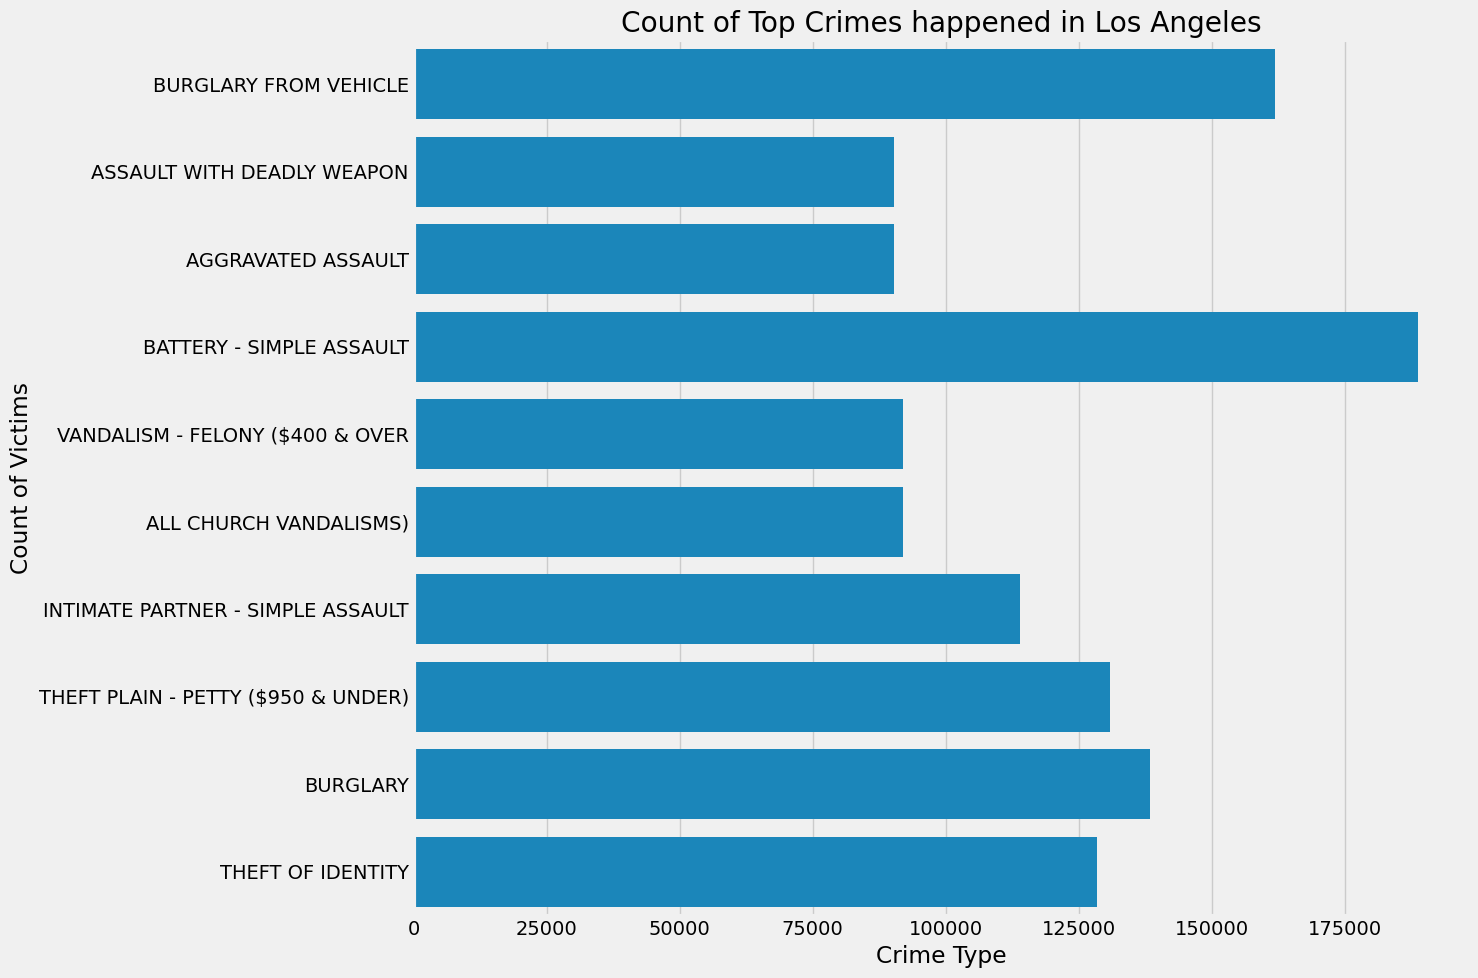

In [63]:
#Visual 1 - FILL IN
plt.figure(figsize=(15, 10))
base_color = sns.color_palette()[0]
sns.countplot(data=df_top_ten, y='crime',color=base_color)
plt.title('Count of Top Crimes happened in Los Angeles')
plt.xlabel('Crime Type')
plt.ylabel('Count of Victims')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show();

*Research question:* 
> the top ten crimes in Los Angeles are:

> 1-BATTERY - SIMPLE ASSAULT\
> 2-BURGLARY FROM VEHICLE\
> 3-BURGLARY \
> 4-THEFT PLAIN - PETTY\
> 5-THEFT OF IDENTITY\
> 6-INTIMATE PARTNER - SIMPLE ASSAULT\
> 7-VANDALISM - FELONY\
> 8-ALL CHURCH VANDALISMS\
> 9-ASSAULT WITH DEADLY WEAPON\
> 10-AGGRAVATED ASSAULT

### How does the representation of victims for each gender compare to other reported victims in Los Angeles?

*Answer to research question:* FILL IN

In [64]:

# Count the number of victims for each gender
df_gender=df.vict_sex.value_counts()
df_gender

vict_sex
M    1156145
F    1141112
X       8123
H         90
N         17
Name: count, dtype: int64

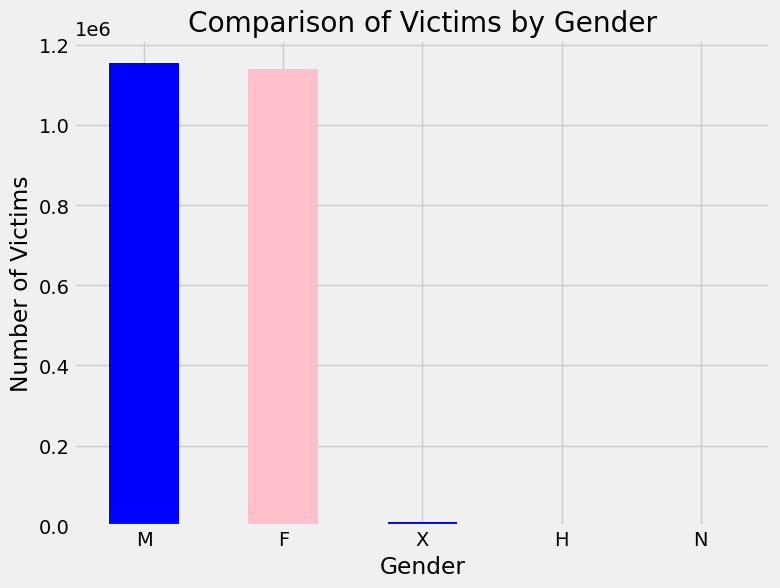

In [65]:
#Visual 2 - 
# Visualize the comparison using a bar chart
plt.figure(figsize=(8, 6))
df_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Comparison of Victims by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0)
plt.show()

*Answer to research question:
> Based on the provided result:

> Male victims: 1,156,145\
Female victims: 1,141,112\
Gender X victims: 8,123\
Gender H victims: 90\
Gender N victims: 17\
This indicates that there were more male victims than female victims reported in Los Angeles. However, it's worth noting that there are also victims categorized under other genders (X, H, N)

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* 
> ##### If I had more time to complete the project, I would prioritize several actions. Firstly, I would focus on improving data quality by converting object data types to datetime where appropriate and filling in missing values instead of dropping columns. Additionally, I would seek out more comprehensive data from 2020 to 2024 to ensure a more robust analysis. In terms of research questions, I would explore the temporal trends of various crime types over the specified timeframe, analyze the effectiveness of crime prevention measures implemented during this period, and investigate the impact of external factors such as socio-economic changes or public policies on crime rates.